In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
# loading the dataset from csv to panda dataframe
car_dataset = pd.read_csv('C:\ACADEMIC\Projects\Machine learning\car price prediction\Dataset\cardata.csv')

In [15]:
#reading the first  5 rows of dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# checking the columns and rows of dataset
car_dataset.shape

(301, 9)

In [17]:
#checking the overall information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
#checking the number of missing or empty spaces in each colummn
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [20]:
#encoding 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding 'Seller_Type' column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [21]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [22]:
#Now splitting the data and target ,, data is all the info except the car name and selling price whereas the target is Selling price

X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']


In [23]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [24]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data


In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training


1. Linear Regression

In [26]:
lin_reg_model=LinearRegression()

In [27]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [28]:
#prediction on Training data
training_data_prediction=lin_reg_model.predict(X_train)

In [29]:
# R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("The R squared error is : ",error_score)

The R squared error is :  0.8799451660493706


Visualize the actual and predicted prices

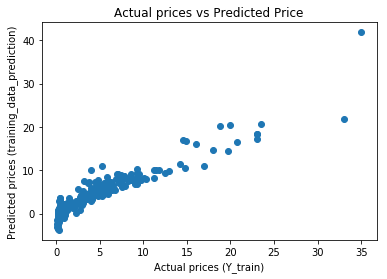

In [30]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices (Y_train)')
plt.ylabel('Predicted prices (training_data_prediction)')
plt.title('Actual prices vs Predicted Price')
plt.show()

In [31]:
#prediction on Test data
test_data_prediction=lin_reg_model.predict(X_test)

# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("The R squared error is : ",error_score)

The R squared error is :  0.8365766715024756


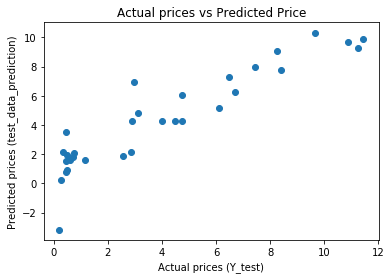

In [32]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual prices (Y_test)')
plt.ylabel('Predicted prices (test_data_prediction)')
plt.title('Actual prices vs Predicted Price')
plt.show()

2. Lasso Regression


The R squared error is :  0.8427856123435794


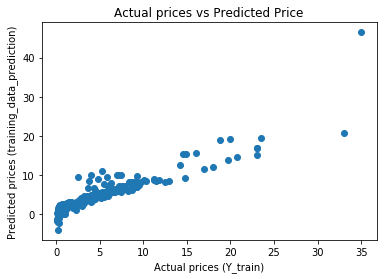

In [33]:
las_reg_model=Lasso()
las_reg_model.fit(X_train,Y_train)

#prediction on Training data
training_data_prediction=las_reg_model.predict(X_train)

# R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("The R squared error is : ",error_score)

plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices (Y_train)')
plt.ylabel('Predicted prices (training_data_prediction)')
plt.title('Actual prices vs Predicted Price')
plt.show()


The R squared error is :  0.8709167941173195


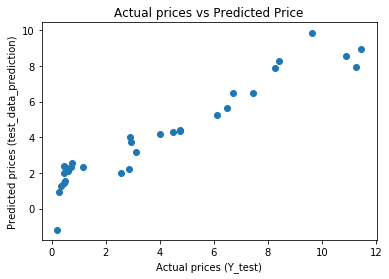

In [34]:
#prediction on Test data
test_data_prediction=las_reg_model.predict(X_test)

# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("The R squared error is : ",error_score)

plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual prices (Y_test)')
plt.ylabel('Predicted prices (test_data_prediction)')
plt.title('Actual prices vs Predicted Price')
plt.show()